In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

#link dataset
link = 'https://www.kaggle.com/imakash3011/customer-personality-analysis'

# Import dataset
file = r'F:\Hoc_dai_hoc\HK5\Phan tich va truc quan du lieu\Dataset\marketing_campaign.csv'
df = pd.read_csv(file, sep = '\t', parse_dates = ['Dt_Customer'])

<ipython-input-1-11361dc6aa83>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Tiền xử lí

In [33]:
# Chuyen mot so feature sang category va datetime

categories = ['Kidhome', 'Teenhome', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
for col in categories:
    df[col] = df[col].astype('category')

df_cat = df[categories]


In [35]:
df.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


Do giá trị tại cột Z_CostContact, Z_Revenue đều giống nhau nên drop

In [6]:
df_cat.describe()

,Kidhome,Teenhome,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
count,2240,2240,2240,2240,2240,2240,2240
unique,3,3,2,2,2,2,2
top,0,0,0,0,0,0,0
freq,1293,1158,2096,2210,2077,2073,2077


In [7]:
for col in categories:
    print(df[col].value_counts())

0    1293
1    899 
2    48  
Name: Kidhome, dtype: int64
0    1158
1    1030
2    52  
Name: Teenhome, dtype: int64
0    2096
1    144 
Name: AcceptedCmp1, dtype: int64
0    2210
1    30  
Name: AcceptedCmp2, dtype: int64
0    2077
1    163 
Name: AcceptedCmp3, dtype: int64
0    2073
1    167 
Name: AcceptedCmp4, dtype: int64
0    2077
1    163 
Name: AcceptedCmp5, dtype: int64


Nhận xét:
- 

In [8]:
df.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [18]:
# Do chi co 24 gia tri bi null tai feature income nen drop
df.dropna(inplace = True)
#Drop feature ID, Z_CostContact, Z_Revenue do khong co y nghia trong viec phan tich du lieu
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis = 'columns', inplace = True)

In [ ]:
?sns.heatmap

<AxesSubplot:>

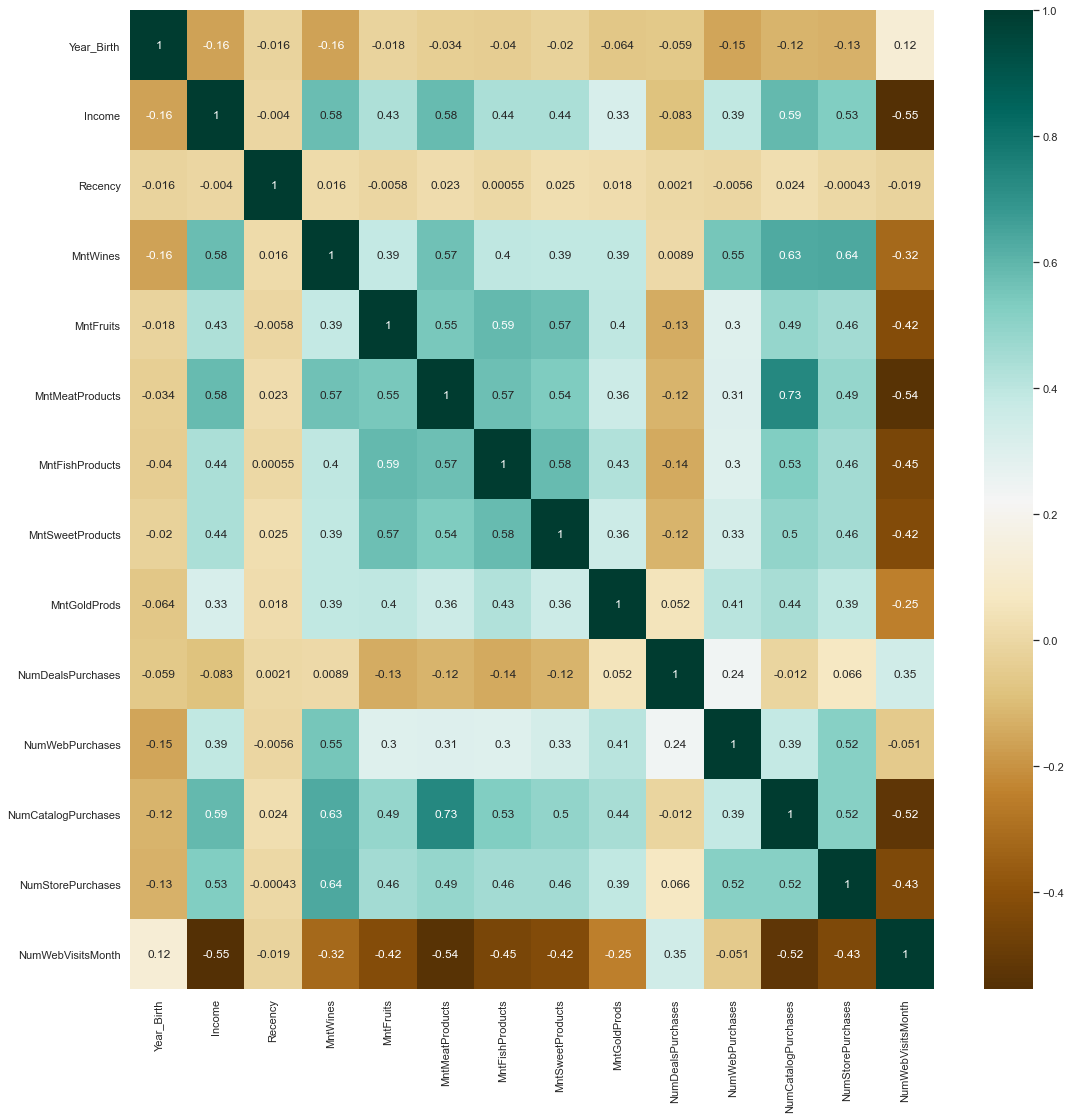

In [34]:
sns.set()
# Correlation heatmap
plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(), annot = True, cmap = 'BrBG')

In [36]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

C:\Users\phuen\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(1920.0, 2010.0)]

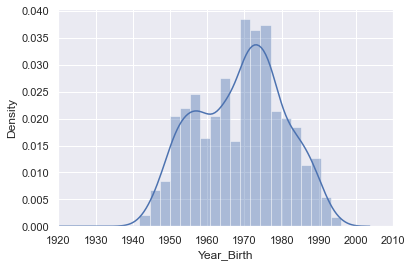

In [66]:
#Phan tich Year_Birth
fig, ax = plt.subplots()
sns.distplot(df['Year_Birth'], ax = ax)
ax.set(xlim = (1920, 2010))


Nhận xét: Đồ thị phân bố khá đều với giá trị lớn với nhiều giá trị tập trung trong khoảng 1970-1975

In [74]:
#Phan tich Education
df['Education'].value_counts()

Graduation    1116
PhD           481 
Master        365 
2n Cycle      200 
Basic         54  
Name: Education, dtype: int64

In [76]:
#Phan tich Marital_Status
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow       76 
Alone       3  
Absurd      2  
YOLO        2  
Name: Marital_Status, dtype: int64